In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync')

In [2]:
tempo_dir = 'RawData/MOVES/TEMPO-wecc-vintage-class-powertrain.csv'
tempo_fleet = read_csv(tempo_dir)
tempo_fleet.head(5)

,Scenario,Year,Mode,Class,Tech,Vintage,Vehicles
0,base-base,2018,Personal_LDV,Compact,BEV_100,1999,81
1,base-base,2018,Personal_LDV,Compact,BEV_100,2000,770
2,base-base,2018,Personal_LDV,Compact,BEV_100,2001,868
3,base-base,2018,Personal_LDV,Compact,BEV_100,2002,2968
4,base-base,2018,Personal_LDV,Compact,BEV_100,2003,69


In [22]:
tempo_group = {'BEV_100':'Electric',
               'BEV_300':'Electric',
               'FCEV': 'Electric',
               'HEV_Gasoline': 'Gasoline',
               'ICEV_Gasoline': 'Gasoline',
               'ICEV_NG': 'CNG',
               'PHEV_25': 'Gasoline',
               'PHEV_50': 'Gasoline'}

print(tempo_fleet['Tech'].unique())
print(tempo_fleet['Mode'].unique())
selected_year = [2018, 2040]
tempo_fleet.loc[:, 'ageID'] = \
tempo_fleet.loc[:, 'Year'] - tempo_fleet.loc[:, 'Vintage']
tempo_fleet.loc[:, 'fuelID'] = \
tempo_fleet.loc[:, 'Tech'].map(tempo_group)

tempo_fleet.loc[tempo_fleet['ageID']>30, 'ageID'] = 30
tempo_fleet_selected = \
tempo_fleet.loc[tempo_fleet['Year'].isin(selected_year)]
tempo_fleet_selected = \
tempo_fleet_selected.loc[tempo_fleet_selected['Scenario'] == 'base-base']
tempo_fleet_selected.head(5)

['BEV_100' 'BEV_300' 'FCEV' 'HEV_Gasoline' 'ICEV_Gasoline' 'ICEV_NG'
 'PHEV_25' 'PHEV_50']
['Personal_LDV']


,Scenario,Year,Mode,Class,Tech,Vintage,Vehicles,ageID,fuelID
0,base-base,2018,Personal_LDV,Compact,BEV_100,1999,81,19,Electric
1,base-base,2018,Personal_LDV,Compact,BEV_100,2000,770,18,Electric
2,base-base,2018,Personal_LDV,Compact,BEV_100,2001,868,17,Electric
3,base-base,2018,Personal_LDV,Compact,BEV_100,2002,2968,16,Electric
4,base-base,2018,Personal_LDV,Compact,BEV_100,2003,69,15,Electric


<Axes: xlabel='ageID', ylabel='Vehicles'>

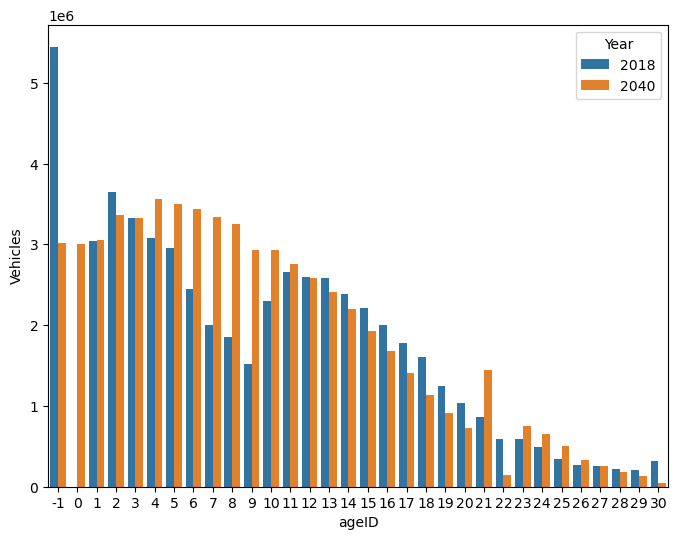

In [24]:
# fleet by age
tempo_fleet_by_age = \
tempo_fleet_selected.groupby(['Year', 'Mode', 'ageID'])[['Vehicles']].sum()
tempo_fleet_by_age = tempo_fleet_by_age.reset_index()
tempo_fleet_by_age.head(5)
plt.figure(figsize = (8,6))
sns.barplot(x = 'ageID', y = 'Vehicles', 
            data = tempo_fleet_by_age, hue = 'Year')

<Figure size 600x500 with 0 Axes>

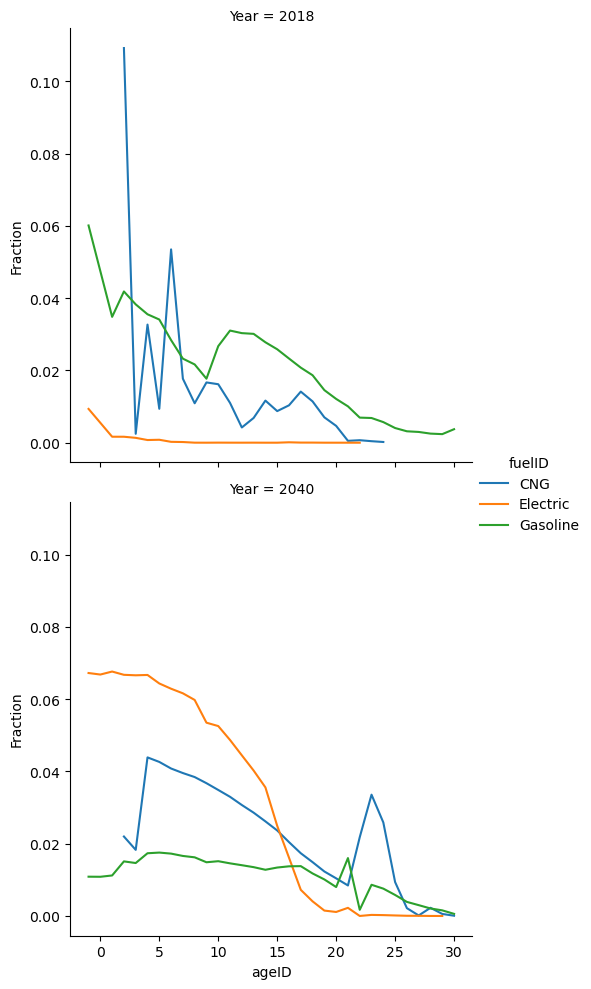

In [31]:
# fleet by age and fuel
tempo_fleet_by_age_fuel = \
tempo_fleet_selected.groupby(['Year', 'fuelID', 'ageID'])[['Vehicles']].sum()

tempo_fleet_by_age_fuel = tempo_fleet_by_age_fuel.reset_index()
tempo_fleet_by_age_fuel.head(5)
tempo_fleet_by_age_fuel.loc[:, 'Fraction'] = \
tempo_fleet_by_age_fuel.loc[:, 'Vehicles'] /\
tempo_fleet_by_age_fuel.groupby(['fuelID'])['Vehicles'].transform('sum')

plt.figure(figsize = (6,5))
sns.relplot(x = 'ageID', y = 'Fraction', 
            data = tempo_fleet_by_age_fuel, 
            hue = 'fuelID',
            row = 'Year', kind = 'line')

In [14]:
tempo_fleet_selected.groupby('Year')['Vintage'].count()

Year
2018    1596
2040    3520
Name: Vintage, dtype: int64